### Prediction of Expenses using healthcare

#### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error

In [2]:
PATH = "C:/Code Playground/hari.mL/Data/insurance.csv"
df = pd.read_csv(PATH)
print("Length: ", len(df))
df.head(5)

Length:  1338


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Normalize the Data

In [3]:
# Adding new columns to capture relationship might increase accuracy
df['age_bmi'] = df['age']*df['bmi']
df.head(5)

,age,sex,bmi,children,smoker,region,expenses,age_bmi
0,19,female,27.9,0,yes,southwest,16884.92,530.1
1,18,male,33.8,1,no,southeast,1725.55,608.4
2,28,male,33.0,3,no,southeast,4449.46,924.0
3,33,male,22.7,0,no,northwest,21984.47,749.1
4,32,male,28.9,0,no,northwest,3866.86,924.8


In [4]:
df['sex'] = df['sex'].apply(lambda x: 0 if x=='female' else 1) # 1 (true) for male
df['smoker'] = df['smoker'].apply(lambda x: 1 if x=='yes' else 0) # 1 (true) if smoker
df['child_smoke'] = df['children']*df['smoker']
df['child_smoke'] = df['child_smoke'].apply(lambda x: 1 if x>0 else 0) # Inspired from ReLU
df.head(5)

,age,sex,bmi,children,smoker,region,expenses,age_bmi,child_smoke
0,19,0,27.9,0,1,southwest,16884.92,530.1,0
1,18,1,33.8,1,0,southeast,1725.55,608.4,0
2,28,1,33.0,3,0,southeast,4449.46,924.0,0
3,33,1,22.7,0,0,northwest,21984.47,749.1,0
4,32,1,28.9,0,0,northwest,3866.86,924.8,0


In [5]:
lb = LabelEncoder()
df['region'] = lb.fit_transform(df['region'])
df.head(5)

,age,sex,bmi,children,smoker,region,expenses,age_bmi,child_smoke
0,19,0,27.9,0,1,3,16884.92,530.1,0
1,18,1,33.8,1,0,2,1725.55,608.4,0
2,28,1,33.0,3,0,2,4449.46,924.0,0
3,33,1,22.7,0,0,1,21984.47,749.1,0
4,32,1,28.9,0,0,1,3866.86,924.8,0


split data

In [6]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'child_smoke', 'age_bmi']]
y = df['expenses']
X

,age,sex,bmi,children,smoker,region,child_smoke,age_bmi
0,19,0,27.9,0,1,3,0,530.1
1,18,1,33.8,1,0,2,0,608.4
2,28,1,33.0,3,0,2,0,924.0
3,33,1,22.7,0,0,1,0,749.1
4,32,1,28.9,0,0,1,0,924.8
...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,0,1550.0
1334,18,0,31.9,0,0,0,0,574.2
1335,18,0,36.9,0,0,2,0,664.2
1336,21,0,25.8,0,0,3,0,541.8


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardize

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X After Standardization: ")
df2 = pd.DataFrame(X_train, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'child_smoke', 'age_bmi'])
df2.head(5)

X After Standardization: 


,age,sex,bmi,children,smoker,region,child_smoke,age_bmi
0,1.544465,-1.025978,0.109490,-0.915011,-0.512989,-0.429071,-0.372406,1.336026
1,0.481874,0.974679,-0.491191,-0.915011,-0.512989,1.367843,-0.372406,0.121441
2,1.048589,-1.025978,0.226289,1.560279,-0.512989,0.469386,-0.372406,0.989823
3,1.119429,0.974679,0.026062,-0.915011,1.949359,-1.327527,-0.372406,0.924455
4,-1.005753,0.974679,2.495529,0.735182,1.949359,0.469386,2.685242,-0.131789


In [9]:
# Standardize y
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()  # Standardize and flatten
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()
print(y_train.shape)

(936,)


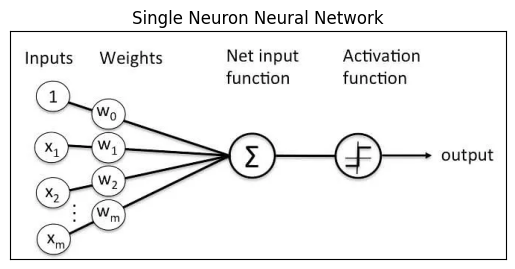

In [10]:
import matplotlib.image as mpimg
img = mpimg.imread('Images/perceptron.webp')
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.title("Single Neuron Neural Network")
# plt.xlabel("Layers")
# plt.ylabel("Inputs + Bias")
plt.show()

#### As this is a Single Neuron Neural Network and depends on 6 features the results may vary with less accuracy

In [11]:
class NeuralNetwork:
    def __init__(self, input_size):
        # Using seed to make sure it'll  
        # generate same weights in every run
        np.random.seed(1)
        # expects to be 6 inputs and single output
        self.weight_matrix = 2*np.random.random((input_size, 1))-1
        # bias
        self.bias = 2*np.random.random((1,)) - 1
    
    def tanh(self, x):
        return np.tanh(x)
    
    def tanh_derv(self, x):
        return 1.0-np.tanh(x)**2
    
    def forward_prop(self, inputs):
        return self.tanh(np.dot(inputs, self.weight_matrix)+ self.bias)
    
    def train(self, train_inps, train_ops, lr, epochs):
        start_time = time.time()
        # Reshape train_ops to ensure compatibility with output
        train_ops = train_ops.reshape(-1, 1)
        for epoch in range(epochs):
            # GET DOT PRODUCT (Forward Pass)
            output = self.forward_prop(inputs=train_inps)
            
            error = train_ops-output # LOSS
            mae = mean_absolute_error(train_ops, output)
            if epoch%10000==0: print(f"Epoch: {epoch}, Loss={np.average(error**2)}, MAE: {mae}")
            # multiply the error by input and then 
            # by gradient of tanh function to calculate
            # the adjustment needs to be made in weights
            # adjustments by back propogation
            update = error*lr*self.tanh_derv(output)
            adj = np.dot(train_inps.T, update)
            bias_adj = np.sum(update)

            # Update weights and bias (Backward Pass)
            self.weight_matrix += adj
            self.bias += bias_adj
        end_time = time.time()
        print(f"Training Process Comlpeted! Took: {end_time-start_time} sec")

In [12]:
nn = NeuralNetwork(input_size=8)
print("Training", end="")
for i in range(3): print(".",end="");time.sleep(1) #JUST FOR FUN
print()
nn.train(X_train, y_train, lr=5*10**-7, epochs=100000)

Training...
Epoch: 0, Loss=2.404701083605577, MAE: 1.2414692956687121
Epoch: 10000, Loss=0.3915393566785262, MAE: 0.3780431301207404
Epoch: 20000, Loss=0.3791155658871596, MAE: 0.36143357073573357
Epoch: 30000, Loss=0.37935662795976044, MAE: 0.36020964088004154
Epoch: 40000, Loss=0.37961045201122523, MAE: 0.35965551936535456
Epoch: 50000, Loss=0.3796916152603071, MAE: 0.35947022485402436
Epoch: 60000, Loss=0.3796795969954257, MAE: 0.3594356735661597
Epoch: 70000, Loss=0.3796284443347646, MAE: 0.3594500453791418
Epoch: 80000, Loss=0.37956458723770503, MAE: 0.3594821907466841
Epoch: 90000, Loss=0.37949958987791854, MAE: 0.35952506358190783
Training Process Comlpeted! Took: 28.390090703964233 sec


In [13]:
preds = nn.forward_prop(X_test)
print(y_test.shape, preds.shape)

(402,) (402, 1)


In [14]:
# Rescale the shape of preds
preds_originals = y_scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
y_test_originals = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [15]:
# Display the first few results for comparison
print("True values:", y_test_originals[:5])
print("Predicted values:", preds_originals[:5])

True values: [ 9095.07  5272.18 29330.98  9301.89 33750.29]
Predicted values: [ 8549.05927563  4830.92008829 25481.57011731  9879.38292997
 25481.56971131]


In [16]:
y_test_originals.shape, preds_originals.shape

((402,), (402,))

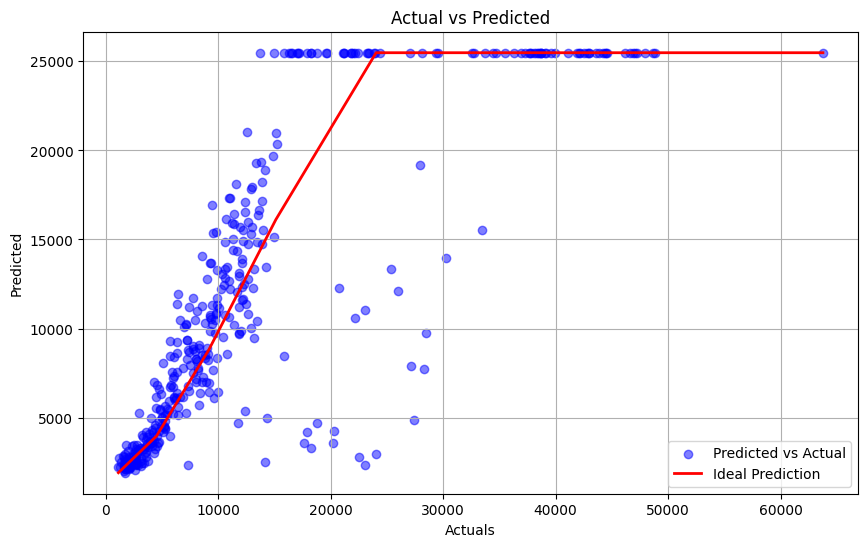

In [17]:
def visualize(X, y, color,title, xlabel, ylabel):
    X = X.flatten()
    y = y.flatten()
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color=color, alpha=0.5, label='Predicted vs Actual')
    plt.plot([X.min(), np.quantile(X, 0.25), np.quantile(X, 0.5), np.quantile(X, 0.75),np.quantile(X, 0.85), X.max()], [y.min(),np.quantile(y, 0.25), np.quantile(y, 0.5), np.quantile(y, 0.75),np.quantile(y, 0.85), y.max()], color='red', linewidth=2, label='Ideal Prediction')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()
visualize(y_test_originals, preds_originals,'blue', "Actual vs Predicted", "Actuals", "Predicted")

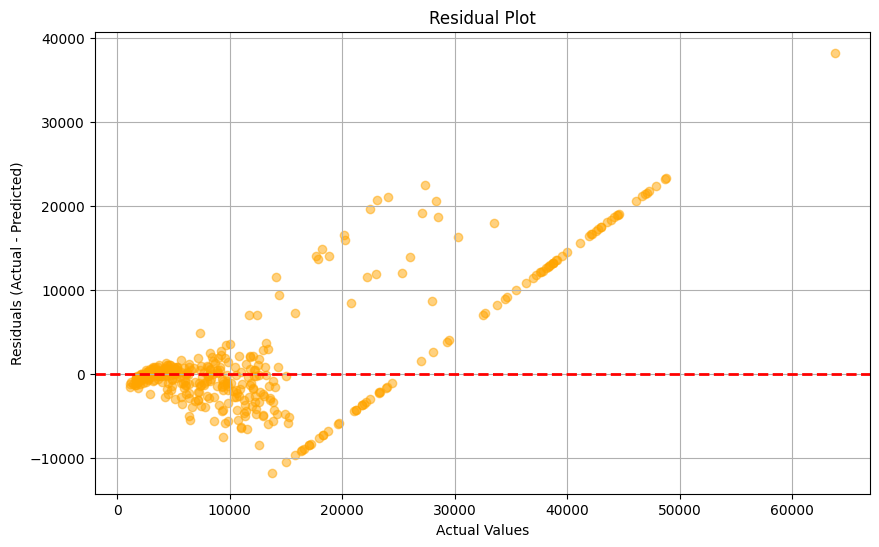

In [18]:
# Calculating residuals
residuals = y_test_originals.flatten() - preds_originals.flatten()

def vis_residuals(y_test, resds):
    y_test = y_test.flatten()
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, resds, color='orange', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', linewidth=2)

    # Adding labels and title
    plt.title('Residual Plot')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid()

    # Show the plot
    plt.show()

vis_residuals(y_test_originals, residuals)

In [ ]:
bins = [0, 400, 800, 1300, np.inf]
labels = [0, 1, 2]

y_test_binned = np.digitize(y_test, bins, right=True)-1
preds_binned = np.digitize(preds, bins, right=True)

cm = confusion_matrix(y_test_binned, preds_binned)
acc_sc = accuracy_score(y_test_binned, preds_binned)

plt.figure(figsize=(8,6))
plt.
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc_sc)

Confusion Matrix:
 [[  0 251  32]
 [  0  22  97]
 [  0   0   0]]
Accuracy Score: 0.05472636815920398
